# Ridge Regression

## Cleaning Data

In [23]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.linear_model import Ridge

# Load Data
listings = pd.read_csv(r"/Users/mikaelalim/Downloads/Airbnb_PricePred-main/data/listings.csv")
listings.drop(
    ["Unnamed: 0",], axis=1, inplace=True,
)

# Standardize
def standardizeData(data):
    # Takes pandas dataframe and standardizes it iteratively
    for column in data:
        data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
    return data
listings = standardizeData(listings)

# Define Price
price = listings.loc[:,"price"]

# Prepare Data
X = listings.drop(["price"], axis=1) #38837x232
y = np.transpose(price) #1x38837

## Ridge Regression from Scratch

[-2.02696316e-02 -4.62476119e-02  2.24361127e-03 -1.37860868e-02
  1.15648112e-01 -2.05825880e-02 -2.40909547e-02  5.36196546e-02
 -3.19767178e-02 -1.41212179e-02 -3.05033525e-03 -3.31527930e-03
 -2.12060650e-03  2.78220850e-03  1.97339466e-03 -5.37588668e-03
  2.53190590e-03 -7.73564374e-03  2.21965230e-04 -1.30147343e-03
 -2.70627324e-03  8.05702865e-03 -2.84620394e-03 -2.72026348e-02
  1.34915853e-03 -1.50306826e-03 -2.09378294e-03 -9.89121895e-03
 -4.90817514e-03  4.89618359e-03 -1.20721800e-02  4.29613257e-03
 -2.40262192e-03 -8.82751047e-03 -5.11556454e-03  1.37968771e-02
 -6.59726798e-03 -6.61142268e-04 -2.44391269e-02 -1.02318620e-03
 -1.53834575e-02  1.02385357e-02 -2.90229224e-03  5.51913016e-04
  3.09429402e-02 -2.75069403e-03 -2.80885774e-03  5.26667920e-04
 -3.33704429e-03 -2.02622109e-03 -3.99232004e-03  2.09707501e-02
 -1.20140549e-03  1.11577733e-02 -3.65998378e-03 -2.93198926e-03
 -5.39673551e-03 -5.40625932e-03 -3.64461243e-03 -6.72690993e-04
 -9.05626959e-03 -1.57890

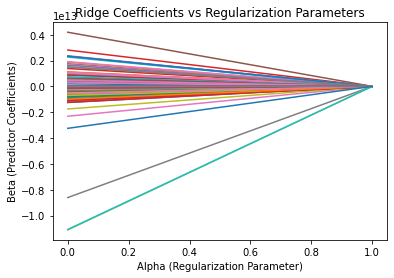

In [24]:
from timeit import default_timer as timer
from datetime import timedelta

# Find Beta Values
start = timer()
n,m = X.shape
I = np.identity(m)
alpha = 1
b1norm = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + alpha * I), X.T), y)
print(b1norm)

# Plot Beta Values

import matplotlib.pyplot as plt

### Initialize list to store coefficient values
coef=[]
alphas = range(0,2)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(X,y)
  coef.append(ridgereg.coef_)

## Make plot of Beta as a function of Alpha
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')

## ax.legend(loc='best')
fig.savefig('coef_vs_alpha.png')

end = timer()
print("The time it took to compute this is", timedelta(seconds=end-start), "seconds.")

## Evaluation of Ridge Regression

In [26]:
# Predict Accuracy
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# First, we split the data into an 80:20 train:test ratio
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Evaluation of Training Set
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred_train_rr= rr.predict(x_train)
RMSE_train = np.sqrt(mean_squared_error(y_train,pred_train_rr))
RMSE_tr = r2_score(y_train, pred_train_rr)

# Evaluation of Test Set
pred_test_rr= rr.predict(x_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,pred_test_rr))
MAE_test = mean_absolute_error(y_test,pred_test_rr)
r2_test = r2_score(y_test, pred_test_rr)
adj_r2 = 1 - (1 - r2_test ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )

print('The root mean-squared error of the test data is', RMSE_test)
print('The mean absolute error is', MAE_test)
print('The r-squared value of the test data is', r2_test)
print('The adjusted r-squared value is', adj_r2)

The root mean-squared error of the test data is 0.7743018082866477
The mean absolute error is 0.29890440098428644
The r-squared value of the test data is 0.2062975302983604
The adjusted r-squared value is 0.20154826801365433


## Trial 2: RR Through a Class

In [16]:
# Importing libraries
  
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Ridge Regression
  
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
      
# Driver code
  
def main() :
      
    # Importing dataset
    df = pd.read_csv(r"/Users/mikaelalim/Downloads/Airbnb_PricePred-main/data/listings.csv")
    df.drop(["Unnamed: 0",], axis=1, inplace=True,)
    df.to_numpy()
    
    X = df.drop(["price"], axis=1) #38837x232
    Y = np.transpose(price) #1x38837    
    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x = sc.fit_transform(X)
    
    def standardizeData(data):
        for column in df:
            if (df[column] != 0).sum() == 0:
                continue
            else:
                df[column] = (df[column] - np.mean(df[column])) / np.std(df[column])
        return df
    
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                                            
                                          test_size = 1 / 3, random_state = 0 )
      
    # Model training    
    model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 1 )
    model.fit( X_train, Y_train )
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )     
    print( "Real values      ", Y_test[:3] )    
    print( "Trained W        ", round( model.W[0], 2 ) )    
    print( "Trained b        ", round( model.b, 2 ) )
      
    # Visualization on test set     
    plt.scatter( X_test, Y_test, color = 'blue' )    
    plt.plot( X_test, Y_pred, color = 'orange' )    
    plt.title( 'Salary vs Experience' )    
    plt.xlabel( 'Years of Experience' )    
    plt.ylabel( 'Salary' )    
    plt.show()
      
if __name__ == "__main__" : 
    main()

ValueError: not enough values to unpack (expected 2, got 1)

## Trial 3

ValueError: x and y must be the same size

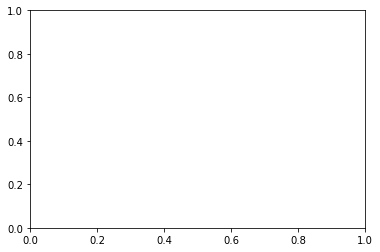

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model

def costFunctionReg(X,y,theta,lamda = 10):
    '''Cost function for ridge regression (regularized L2)'''
    #Initialization
    m = len(y) 
    J = 0
    
    #Vectorized implementation
    h = X @ theta
    J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg;
    return(J)

def gradient_descent_reg(X,y,theta,alpha = 0.0005,lamda = 10,num_iters=1000):
    '''Gradient descent for ridge regression'''
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #Used for three D plot

    for i in range(num_iters):
        #Hypothesis function
        h = np.dot(X,theta)
        
        #Grad function in vectorized form
        theta = theta - alpha * (1/m)* (  (X.T @ (h-y)) + lamda * theta )
           
        #Cost function in vectorized form       
        J_history[i] = costFunctionReg(X,y,theta,lamda)
           
        #Calculate the cost for each iteration(used to plot convergence)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])   
    return theta ,J_history, theta_0_hist, theta_1_hist

#Generating sine curve and uniform noise
x = pd.read_csv(r"/Users/mikaelalim/Downloads/Airbnb_PricePred-main/data/listings.csv")
x.drop(["Unnamed: 0",], axis=1, inplace=True,)
x = listings.drop(["price"], axis=1) #38837x232
x.to_numpy()
noise = 1*np.random.uniform(size = 38837)

y = listings.loc[:,"price"] 
y = np.transpose(price)
y_noise = (y.to_numpy() + noise).reshape(-1,1)

#Centering the y data
y_noise = y_noise - y_noise.mean()

#Design matrix is x, x^2
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)

#Plotting the result
plt.scatter(x,y_noise, label = 'Dataset')
plt.plot(x,y - y.mean(),label = 'Sine')
plt.title('Noisy sine curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

l = 10

#Setup of meshgrid of theta values
T1, T2 = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))

#Computing the cost function for each theta combination
zs = np.array(  [costFunctionReg(X, y_noise.reshape(-1,1),np.array([t1,t2]).reshape(-1,1),l) 
                     for t1, t2 in zip(np.ravel(T1), np.ravel(T2)) ] )
#Reshaping the cost values    
Z = zs.reshape(T1.shape)


#Computing the gradient descent
theta_result_reg,J_history_reg, theta_0, theta_1 = gradient_descent_reg(X,y_noise,np.array([7.,10.]).reshape(-1,1), 0.8,l,num_iters=5000)


#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T1, T2, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history_reg, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_zlabel('error')
ax.set_title('RSS gradient descent: Root at {}'.format(theta_result_reg.ravel()))
ax.view_init(45, -45)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T1, T2, Z, 100, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

plt.suptitle('Cost function and gradient descent: Ridge regularization')
plt.show()